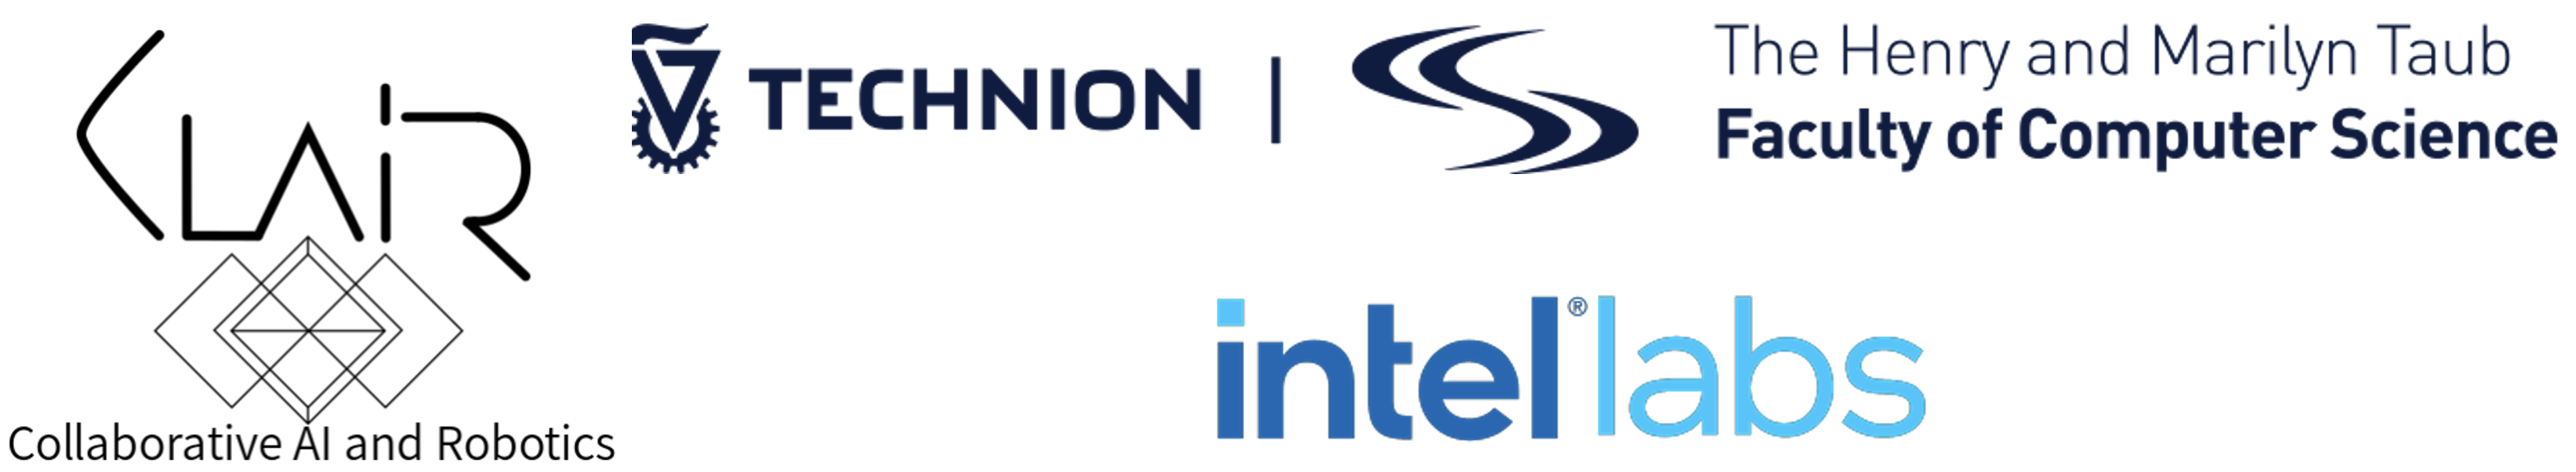

by Shiran Dapht, Ido Jacobi

# HW1 - Planning in N-table Blocks World (NTBW)


This notebook will guide you through the tasks outlined in the NTBW homework assignment. Please follow the instructions in each section and fill in the code cells and markdown cells as required.

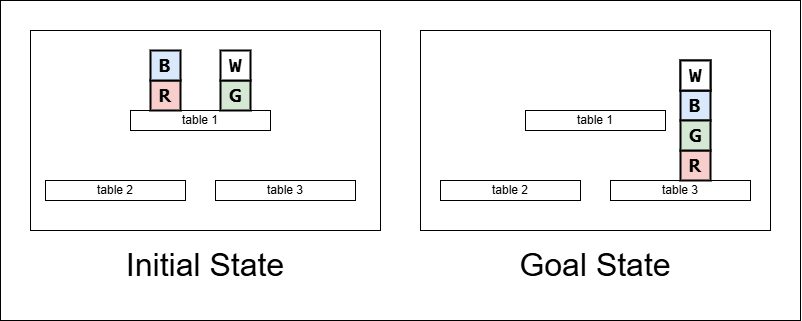

#  install the library from github

Please run in advance

In [ ]:
!pip install "aidm[pddl] @ git+https://github.com/CLAIR-LAB-TECHNION/aidm"
!pip install pddlgym

  Cloning https://github.com/CLAIR-LAB-TECHNION/aidm to /tmp/pip-install-_nlfi3ht/aidm_2d4b866bf66745b29b349a43e54a62ff
  Running command git clone --filter=blob:none --quiet https://github.com/CLAIR-LAB-TECHNION/aidm /tmp/pip-install-_nlfi3ht/aidm_2d4b866bf66745b29b349a43e54a62ff
  Resolved https://github.com/CLAIR-LAB-TECHNION/aidm to commit 8981740799c2e1b53ed32f10d3f0024ca0610ab2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/CLAIR-LAB-TECHNION/pddlgymnasium to /tmp/pip-install-_nlfi3ht/pddlgymnasium_d47faa292bf24e2ba2fae602971111a2
  Running command git clone --filter=blob:none --quiet https://github.com/CLAIR-LAB-TECHNION/pddlgymnasium /tmp/pip-install-_nlfi3ht/pddlgymnasium_d47faa292bf24e2ba2fae602971111a2
  Resolved https://github.com/CLAIR-LAB-TECHNION/pddlgymnasium to commit 18eec44b5358427f32e68536151f0aebd6e12be7
  Preparing metadata (setup.py) ... done
   ━━

# Part 1: Modeling NTBW with PDDL


## Story time!
### Redesign the Sitting Orientation for the MDR Department
As a **secret PDDL engineer** at *Lumon* Industries, you are tasked with designing the new sitting orientation for the MDR department in their new office, "Table 3." Here's the current configuration:

**Current Configuration**:
Helly R and Dylan G sit close to the entrance.
Irvin B's cubicle is stacked on top of Helly R's.
Mark S's cubicle is stacked on top of Dylan G's.

**New Configuration** for Table 3:
Due to Ms. Cobel’s decision, all MDR employees must be relocated to "Table 3" with the following arrangement:
Helly R's cubicle is at the bottom.
Dylan G's cubicle is stacked on top of Helly's.
Irvin B's cubicle is stacked on top of Dylan's.
Mark S's cubicle is at the very top.

**You decide to follow Ms. Cobel's directive by modeling the problem as a PDDL planning task.**



##Task 1.1: Domain Design
Design a PDDL domain for NTBW with the specified actions and predicates.

Instructions:
* Create a PDDL domain file.
  - Include the actions:
    * pick-up
    * put-down
    * stack
    * unstack
  - Include the predicates:
    * on
    * ontable
    * clear
    * handempty
    * holding
  - Parameterize the actions to include multiple
 tables.
  - Include colors


In [ ]:
# TODO
# Enter your ntbw domain here
DOMAIN = """
(define (domain blocks-world)
  (:requirements :strips :typing :equality)
  (:types block)
  (:predicates (on ?b1 - block ?b2 - block)
	           (ontable ?b - block)
	           (clear ?b - block)
	           (handempty)
	           (holding ?b - block)
 )

  (:action pick-up
	     :parameters (?b - block)
	     :precondition (and (clear ?b)(ontable ?b)(handempty))
	     :effect
	     (and (not (ontable ?b))
		   (not (clear ?b))
		   (not (handempty))
		   (holding ?b)))

  (:action put-down
	     :parameters (?b - block)
	     :precondition (holding ?b)
	     :effect
	     (and (not (holding ?b))
		   (clear ?b)
		   (handempty)
		   (ontable ?b)))

  (:action stack
	     :parameters (?b1 ?b2 - block)
	     :precondition (and (holding ?b1) (clear ?b2))
	     :effect
	     (and (not (holding ?b1))
		   (not (clear ?b2))
		   (clear ?b1)
		   (handempty)
		   (on ?b1 ?b2)))

  (:action unstack
	     :parameters (?b1 - block?b2 - block)
	     :precondition (and (on ?b1 ?b2) (clear ?b1)(handempty))
	     :effect
	     (and (holding ?b1)
		   (clear ?b2)
		   (not (clear ?b1))
		   (not (handempty))
		   (not (on ?b1 ?b2)))))

"""

## Task 1.2: Problem design

Define a problem with:

* Four blocks and three tables.
* An initial configuration:
  - `HellyRcubicle` is on `table1`
  - `DylanGcubicle` is on `table1`
  - `IrvinBcubicle` is on `HellyRcubicle`
  - `MarkScubicle` is on `DylanGcubicle`
* A goal configuration requiring at least one stack involving two or more blocks.
  - `HellyRcubicle` is on `table3`
  - `DylanGcubicle` is on `HellyRcubicle`
  - `IrvinBcubicle` is on `DylanGcubicle`
  - `MarkScubicle` is on `IrvinBcubicle`

Instructions:

- Create a PDDL problem file.
- Define the initial and goal states as per the requirements.


In [ ]:
# TODO
# Enter your ntbw problem here

PROBLEM = """

"""

# Questions

### Q1: Explain why NTBW requires extending traditional Blocks World predicates and actions.



Answer: *TODO* (Limit your answer to 4 sentences)

### Q2: What aspects of real-world complexity are missing in your PDDL representation?



Answer: TODO (Limit your answer to 6 sentences)

###Q3: Propose Ways to Represent Real-World Uncertainties
Write a detailed verbal explanation about how real-world uncertainties might be represented in planning systems. Reflect on the limitations of **PDDL (Planning Domain Definition Language)** in capturing such uncertainties. Specifically:

1. **Identify gaps in PDDL:** Discuss what features or elements PDDL lacks.
2. **Propose solutions:** Suggest ways to extend or adapt PDDL or other planning frameworks to address these limitations.
3. **Provide examples:** Illustrate your points with examples of real-world scenarios where uncertainties play a significant role, and explain how your proposed methods would improve the representation.

Your response should focus on theoretical insights and conceptual solutions, avoiding implementation details or code. Aim for clarity and depth in your explanation.



Answer: TODO (Limit your answer to 8 sentences)

# Part 2: Solving NTBW with A*

In [ ]:
from aidm.environments.pddl.pddl_problem import PDDLProblem
problem = PDDLProblem(domain=DOMAIN, problem=PROBLEM)

## Task 2.1: Warm-up
TODO implement the goal_heuristic from the tutorials

In [ ]:
def our_heuristic(node, problem):
    #complete the implementation from Tutorial 1

Run the code below and see if your solution is valid

In [ ]:
from aidm.search.best_first_search import a_star
[best_node, best_plan, resources] = a_star(problem=problem,heuristic_func=our_heuristic, use_closed_list=True)

print_results(info='a_star with our heuristic', node=best_node, plan=best_plan, resources=resources)

###Q1: Explain the "our_heuristic" Function in PDDL-Based Planning
####Functionality: Explain what the "our_heuristic" function does and how it supports the planning process.
####Return Value: Describe what the function returns and how this value is interpreted in the planning context.
####Analogy to Metric Distance: Discuss whether the function's behavior or output serves as a good heuristic, including any relevant characteristics that support this claim.



Answer: TODO (Limit your answer to 4 sentences)

## Task 2.2: Blocks transfer through an intermediate table
**Due to a defect in the manipulator, it cannot move blocks directly from the source table to the destination table and needs to first be placed on a special kind of table of type transfer table.**

### 1) Modify the Domain Design and Generate a Valid Path
Update the Domain Design: Modify the domain file to reflect the constraint that blocks cannot be moved directly between tables. Ensure that all block movements must pass through an transfer table as an intermediate step.

Run the A* Algorithm: Use the updated domain design to run the A* search algorithm. [see for referance 2.1]

Output the Resulting Path: Present the resulting path generated by the algorithm, ensuring it adheres to the constraint.

Provide both the modified domain file and the resulting path for review.

In [ ]:
#HINT: You need to explicitly modify the domain and the problem files to enforce this constraint

In [ ]:
# TODO enter your domain here
DOMAIN_MOD=
"""

"""


In [ ]:
# TODO enter your problem here
PROBLEM_MOD =
"""

"""


Run A star and see if your output is correct:

In [ ]:
problem = PDDLProblem(domain=DOMAIN_MOD, problem=PROBLEM_MOD)
[best_node, best_plan, resources] = a_star(problem=problem,heuristic_func=our_heuristic, use_closed_list=True)

print_results(info='a_star with our heuristic', node=best_node, plan=best_plan, resources=resources)

**If the constraint described above now becomes a preference (i.e., it is possible but more costly to move the items directly) we can change the heuristic function and the cost so it would prefer paths that use the transfer table.**
### 2) Develop a Pseudocode for a Modified Heuristic Function.
1. Objective: Write pseudocode for a modified domain and heuristic function that adhere to the preferences described above.

2. Guidelines:
  * Clearly outline how the heuristic function operates.
  * Specify any external considerations or assumptions outside of standard PDDL variables that your heuristic leverages.
  * Ensure the pseudocode includes logic to penalize direct moves.
  * You can state the cost of different functions

Provide clear, structured, and concise pseudocode along with an explanation of its logic and effectiveness.



**Unfortunately, our planner does not support action costs - so you will need to use a different pddl-based solver to check your solution**



In [ ]:
# TODO enter your pseudocode here
# DO NOT RUN IT

Answer: TODO

# Questions

### Q1: Why is admissibility important for A* heuristics? Are all your heuristics admissible?



Answer: TODO  (Limit your answer to 3 sentences)

###Q2: Discuss the trade-off between computational efficiency and heuristic quality.

Answer: TODO  (Limit your answer to 3 sentences)

# Part 3: Bonus

This time we want to use colors. Let's assume we may have multiple blocks from the same color, and the goal is to have a specific setup of colors (not of named blocks). For example, the requirement may be to have a yellow block on top of a green block on table 2.

Define the appropriate domain and problem files.

In [ ]:
#Hint: use constants

In [ ]:
# Your domain file here

In [ ]:
# Your problem file here

# Part 4: Solving NTBW with Q-Learning

We can also try other approaches. For example, we can use a method called q-learning, which is a reinforcement learning algorithm. As opposed to the model-based approaches above that relied on a model of the environment to search the state space, q-learning is a model-free approach, meaning it learns from interactions with the environment (here, implemented using a PDDL representation) by updating estimates of the quality of actions based on observed rewards.

At its core, Q-learning is based on the concept of a Q-table, which stores the Q-value, representing the expected cumulative reward for taking each action in every possible state. The algorithm iteratively updates the Q-values as it explores the environment.

Formally, each state $s$ and action $a$ is associated with a Q-value $Q(s,a)$

$Q(s,a)\leftarrow Q(s,a)+α(r+γmax_{a′}Q(s′,a′ )−Q(s,a))$

Where:

$𝑄(𝑠,𝑎)$ is the Q-value of state-action pair $(𝑠,𝑎)$, $𝑟$ is the reward received after taking action $𝑎$ in state $s$, $𝑠′$ is the next state, $\alpha$ is the learning rate (a parameter determining the impact of new information) and $\gamma$ is the discount factor (a parameter balancing immediate and future rewards).

Q-learning is widely used in various applications, including robotics, gaming, recommendation systems, and autonomous vehicles, where agents must learn optimal strategies through trial and error. It's a foundational algorithm in the field of reinforcement learning and forms the basis for more advanced techniques like Deep Q-Networks (DQN).

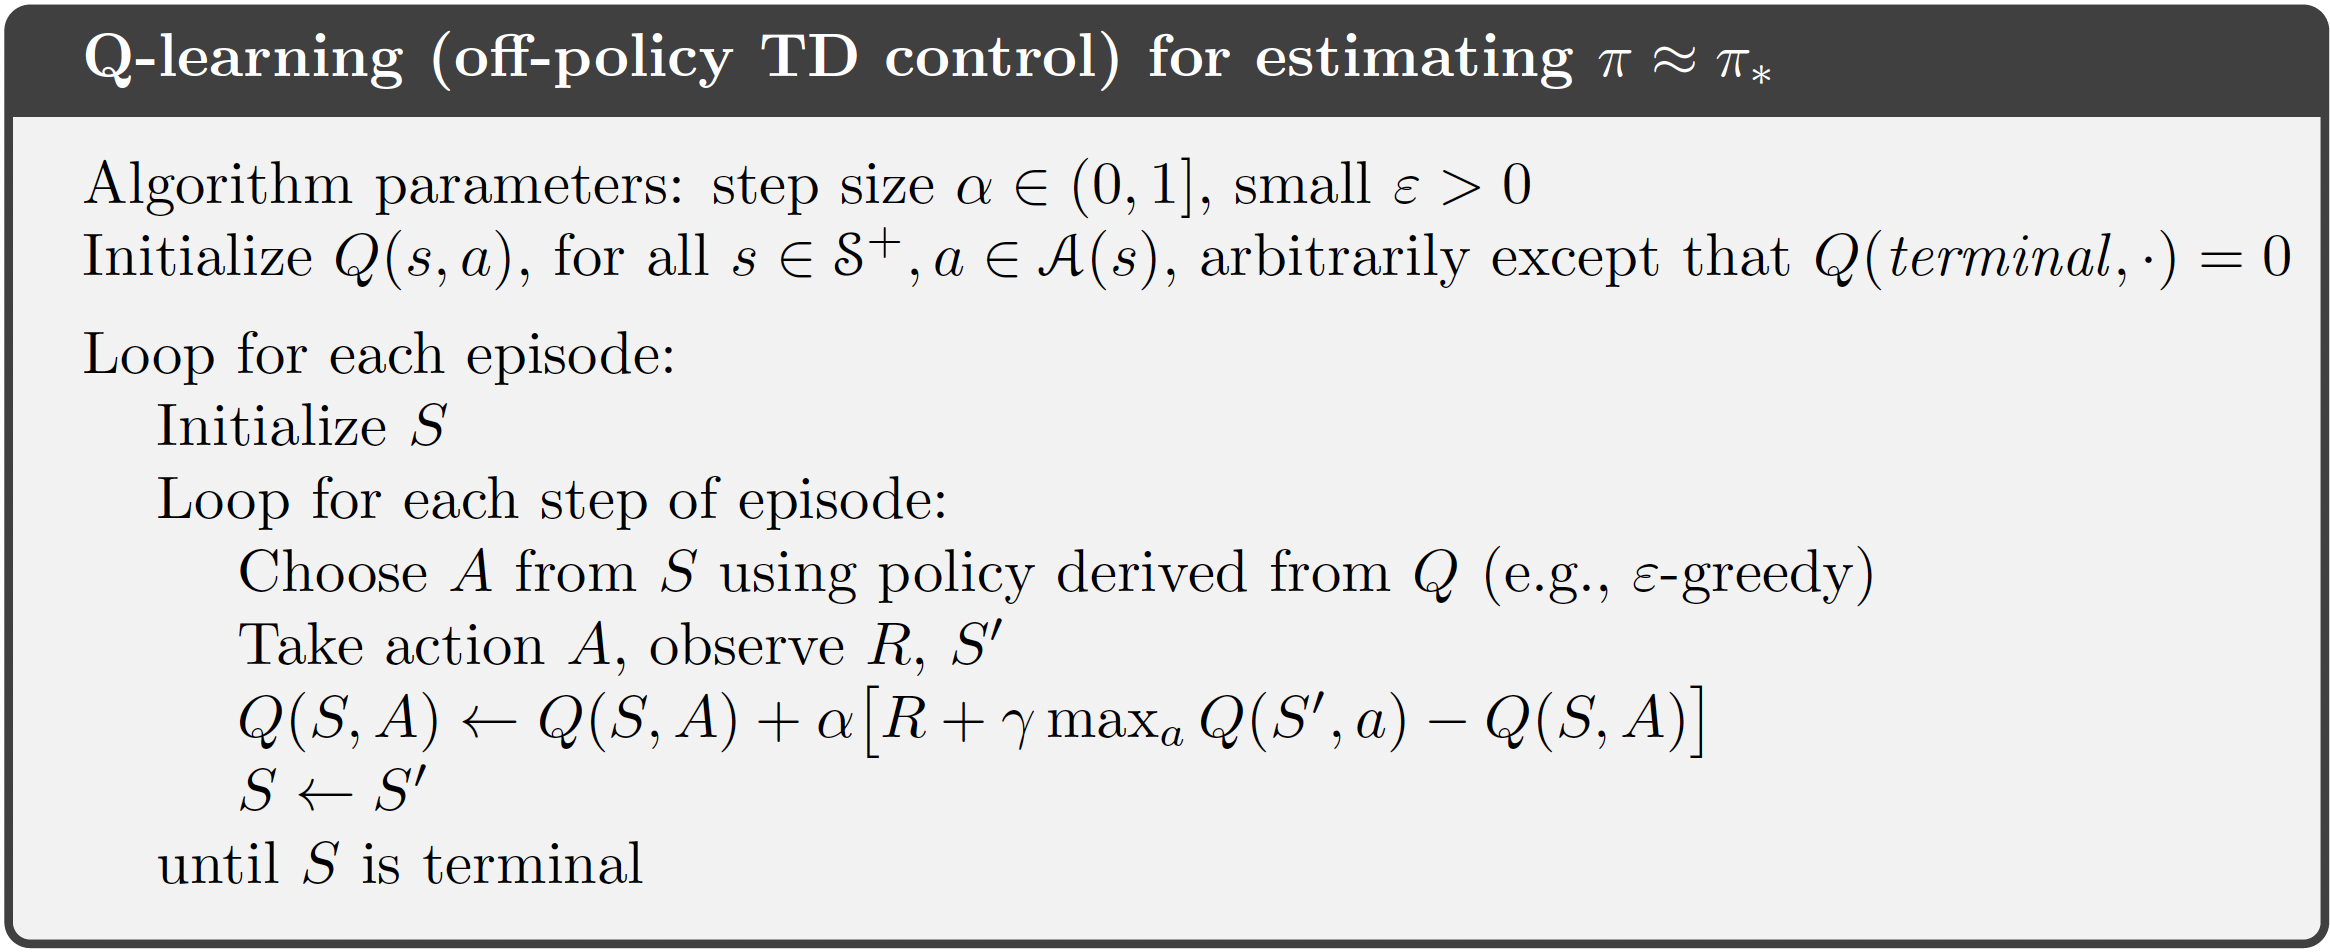

The pseudo-code in the image describes the Q-learning algorithm as in [Reinforcement Learning - an Introduction (second edition) by Richard S. Sutton and Andrew G. Barto](https://mitpress.mit.edu/9780262039246/reinforcement-learning/):
- The agent maintains a Q-table that stores the expected future reward for taking an action in a given state.
- It interacts with the environment:
- Chooses an action (explore vs. exploit using epsilon-greedy).
- Takes the action, receives a reward, and observes the next state.
- Updates the Q-value for the previous state-action pair using the reward and the best future reward from the new state (TD learning).
- Repeats, learning the best actions to take in each state for long-term reward.

If you are interested in the relationship between planning and RL we recommend [this](https://www.youtube.com/watch?v=45FKxa3qPHo) video by Michael Littman.

### Training Example

Let's train a vanilla Q-learning agent to solve an NTBW problem. We first initialize the agent with the appropriate hyperparameters. In this case, with learning rate ($\alpha$) 0.9 and discount factor ($\gamma$) 0.99.

In [ ]:
from aidm.rl.q_learning import QLearning
qlearning = QLearning(learning_rate=0.9, discount_factor=0.99)

In Q-learning, we interact with an environment, not a model. A common API for environments is the [gymnasium API](https://github.com/Farama-Foundation/Gymnasium). Coincidentally, the underlying PDDL parser in our `problem` object is actually a gymnasium environment.

In [ ]:
env = problem.env

We will now begin training. With every step, we update the q-table according to the update step defined above. Every few episodes we will evaluate our agent's performance. After training we receive the performance history which allows us to analyze training.

In [ ]:
import random
random.seed(42)  # set random seed to avoid changing results for the purpose of demonstration

history = qlearning.train(env, num_episodes=2500, max_steps_per_episode=50, eval_every=100, eval_kwargs=dict(pbar=False))
history

Notice how the agent's performance fluctuates. Even though it achieves optimal performance around the middle of training, it "forgets" how to solve the problem before "remembering" again. This is a result of a learning rate that is too high. We are able to find this issue thanks to the performance history.

For the purpose of this demonstration, we are not required to fix the hyperparameters and retrain. The agent will consistently achieve maximum (discounted) reward on the single problem described in PDDL. Let's evaluate the agent's performance to verify this.

In [ ]:
qlearning.evaluate(env, aggregate_episode_rewards=True)

We cannot be certain that this is the highest possible value the agent can acieve without disecting the problem and finding the optimal solution. Moreover, due to the high learning rate, we are all but certain that the q-table does not represent the true action value function. However, we will show below that our agent solves the problem optimally.

### A Step-by-step Breakdown

Let's solve the problem step-by-step. We start with B2 on B1, and we want B3 to be on B1. As a human with general reasoning capabilities, we can deduce that the optimal course of action is: unstack B2 from B1, put down B2 anywhere, pick up B3, and stack B3 on B1. Let's see if our agent's Q-table leads him it to the same conclusion.

First, let's extract a policy from our agent, that is, a function that receives the current state and outputs the action to take

In [ ]:
policy = qlearning.to_policy(env)

Let's reset the environment to the problem's initial state.

In [ ]:
s, info = env.reset()
s.literals

This is the expected initial state. Let's see what actions are valid from this state.

In [ ]:
env.action_space.all_ground_literals(s)

Now let's see how the agent's Q-table values the different actions from this state.

In [ ]:
q = qlearning.q_table
q[s]

As expected, the estimated Q-value for the expected action, unstack B2 from B1, much higher than all other actions. Thus, this is the action our policy will choose.

In [ ]:
a = policy(s)
a

Let's perform this action now.

In [ ]:
s, r, term, trunc, info = env.step(a)
print(f'task complete: {term or trunc}')
print(f'received reward: {r}')
print('new state:')
s.literals

We have taken our first step and everything is going according to what we expected. Let's continue this for three more steps.

Step 1:

In [ ]:
q[s]

In [ ]:
a = policy(s)
a

In [ ]:
s, r, term, trunc, info = env.step(a)
print(f'task complete: {term or trunc}')
print(f'received reward: {r}')
print('new state:')
s.literals

Step 2:

In [ ]:
q[s]

In [ ]:
a = policy(s)
a

In [ ]:
s, r, term, trunc, info = env.step(a)
print(f'task complete: {term or trunc}')
print(f'received reward: {r}')
print('new state:')
s.literals

Finally, step 3:

In [ ]:
q[s]

In [ ]:
a = policy(s)
a

In [ ]:
s, r, term, trunc, info = env.step(a)
print(f'task complete: {term or trunc}')
print(f'received reward: {r}')
print('new state:')
s.literals

Is the task complete?

### Hyperparameter Tuning

A hyperparameter is a parameter in our learning algorithm that changes certain aspects of how the algorithm behaves. We already met two hyperparameters: the learning rate ($\alpha$) and the discount factor ($\gamma$). Our implementation of Q-learning includes two more hyperparameters: the initial exploration coefficient ($\epsilon$) and the exploration coefficient decay ($\kappa$). These hyperparameters help regulate the [exploration-exploitation trade-off](https://en.wikipedia.org/wiki/Exploration-exploitation_dilemma). At each step, the agent either chooses a random action with probability $\epsilon$, and chooses the "best" action according to the Q-table with probability $1 - \epsilon$. After an action is chosen, we use a multiplicative decay and update our exploration coefficient like so: $\epsilon = \epsilon \cdot \kappa$. We can also view our training parameters as hyperparameters. These are the number of episodes run and the number of steps per episode.

**Hyperparameter tuning** is the practice of finding the right combination of hyperparameters to maximize performance. This is an active field of research with many flavors from brute-force search to meta-optimization using control theory. As we already saw, choosing poor hyperparameters can significantly affect training. Our choice of an extremely high learning rate didn't allow our learner to converge and caused training to be unstable. One could say that we were "lucky" that we stopped training on a Q-table that led to the optimal solution.

#### Task 4.1:

Using trial-and-error, find hyperparameters that maximize performance and minimize training time while maintaining a stable training process.

**NOTE**: a training process is considerred "stable" if the agent performance history shows a gradual increase of performance and minimal dips in performance. Feel free to decrease the `eval_every` argument for a more granular performance history.

In [ ]:
tuned_qlearning = QLearning(learning_rate=0.3, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.999)
history = tuned_qlearning.train(env, num_episodes=300, max_steps_per_episode=50, eval_every=100, eval_kwargs=dict(pbar=False))
history

# Question

###Q1: Is this the right approach for this problem?



Answer: TODO (Limit your answer to 3 sentences)


### Q2: Compare Q-learning and A* in terms of:

* Solution optimality.
* Time to train (Q-learning) vs. search (A*).
* Ease of implementation and scalability.

You can include graphs if necessary.



Answer:  TODO

### Q3: What challenges arise when using Q-learning for NTBW? How do they differ from A*?


Answer: TODO (Limit your answer to 4 sentences)

###Q4: How would you adapt the reward function for real-world NTBW problems with noisy sensors?


Answer: TODO (Limit your answer to 3 sentences)

###Q5: Discuss how to adapt the NTBW problem for a robotic arm simulation using MuJoCo.



Answer: TODO (Limit your answer to 3 sentences)